In [32]:
import numpy as np
import pandas as pd

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv(r'C:\Users\uddha\OneDrive\Desktop\Datasets\HousingData.csv')

In [35]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [36]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [37]:
df.shape

(506, 14)

In [38]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [26]:
#Data Cleaning

In [39]:
df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)
df['ZN'].fillna(df['ZN'].mean(), inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(), inplace=True)
df['CHAS'].fillna(df['CHAS'].mean(), inplace=True)
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['LSTAT'].fillna(df['LSTAT'].mean(), inplace=True)

In [40]:
#correlation
corr_matrix = df.corr()
print(corr_matrix['MEDV'].sort_values(ascending= False))

MEDV       1.000000
RM         0.695360
ZN         0.365943
B          0.333461
DIS        0.249929
CHAS       0.179882
CRIM      -0.379695
AGE       -0.380223
RAD       -0.381626
NOX       -0.427321
TAX       -0.468536
INDUS     -0.478657
PTRATIO   -0.507787
LSTAT     -0.721975
Name: MEDV, dtype: float64


In [ ]:
#CHAS has the least correlation with MEDV so we will remove that column from data 

In [41]:
#feature importance

from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['MEDV'])
y = df['MEDV']

model = RandomForestRegressor()
model.fit(X,y)

#finding important features
feature_importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Features': features, 'Importance' : feature_importances})
importance_df = importance_df.sort_values(by= 'Importance', ascending = False)

print(importance_df)



   Features  Importance
5        RM    0.526352
12    LSTAT    0.263546
7       DIS    0.073515
0      CRIM    0.045531
4       NOX    0.025217
9       TAX    0.015044
10  PTRATIO    0.014228
6       AGE    0.012225
11        B    0.011962
2     INDUS    0.005492
8       RAD    0.004489
3      CHAS    0.001348
1        ZN    0.001050


In [42]:
#from above list zn has the lowest feature importance so lets remove ZN column from data 

df = df.drop(columns = ['CHAS', 'ZN'])

df.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


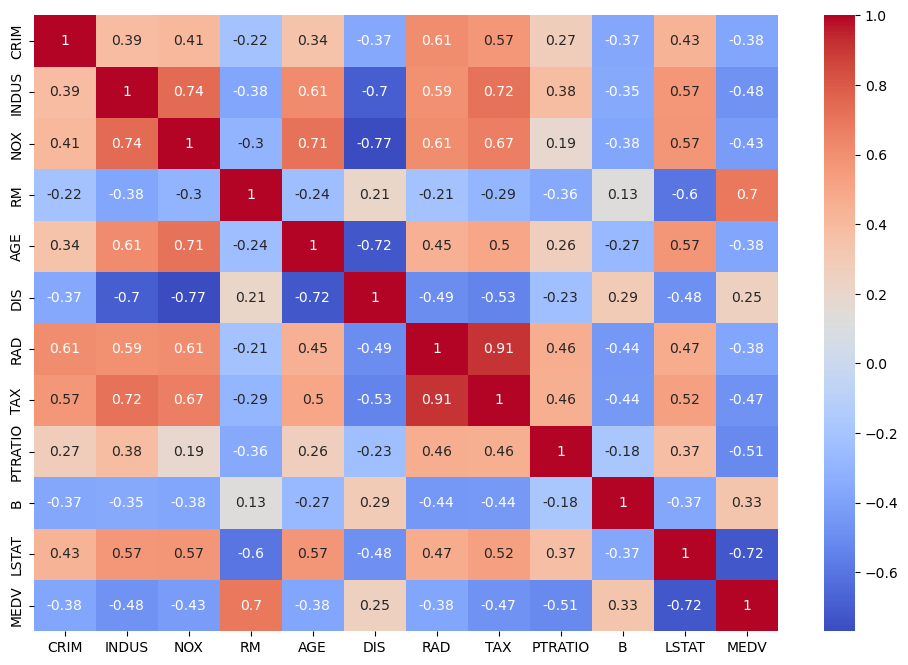

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

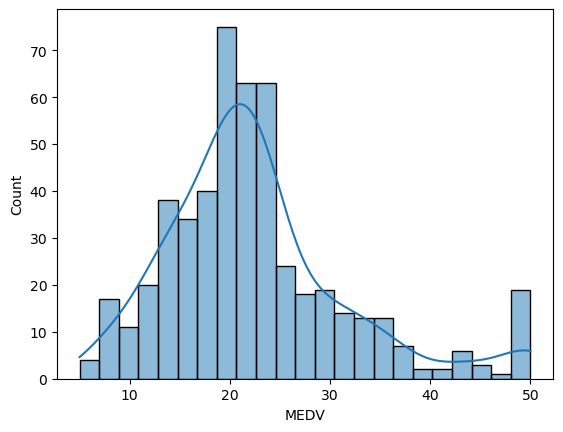

In [48]:
sns.histplot(df['MEDV'], kde = True)
plt.show()

In [ ]:
#data splitting

from sklearn.model_selection import train_test_split
x= df.drop(columns = ['MEDV'])
y= df['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

# Applying Machine Learning models
i'm applying 3 regression models : linear, random forest, support vector

## Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model_lr = LinearRegression()

model_lr.fit(x_train,y_train)

y_pred_lr = model_lr.predict(x_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

## Random Forest Regression

In [56]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

model_rf.fit(x_train, y_train)

y_pred_rf = model_rf.predict(x_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

## Support Vector Regression(SVR)

In [57]:
from sklearn.svm import SVR

model_svm = SVR()

model_svm.fit(x_train, y_train)

y_pred_svm = model_svm.predict(x_test)

mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Evaluating the models

In [59]:
model_metrics = pd.DataFrame({'Model_name': ["Linear", "Randomforest", "SVM"],
                              'MSE_scores': [mse_lr, mse_rf, mse_svm],
                              'r2_scores' : [r2_lr, r2_rf, r2_svm]})

print(model_metrics)
    

     Model_name  MSE_scores  r2_scores
0        Linear   26.270498   0.641768
1  Randomforest    9.543300   0.869865
2           SVM   54.232180   0.260475


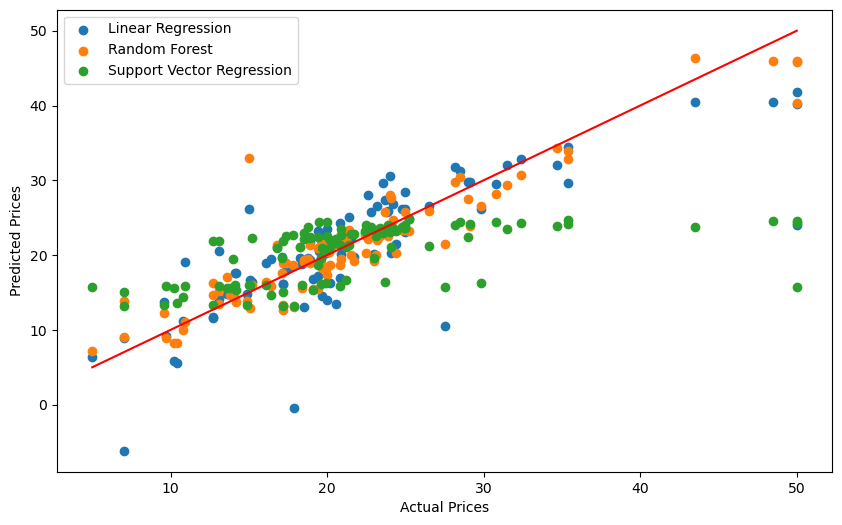

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression')
plt.scatter(y_test, y_pred_rf, label='Random Forest')
plt.scatter(y_test, y_pred_svm, label='Support Vector Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

# Conclusion 
    - From the model metrics we can see that the RandomForest model has low MSE and high R2 value so it is the best model for this data
    - Linear model is a good baseline model with decent performance
    - SVM model doesnt perform well and may not be suited for this dataset